In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
from matplotlib import dates as mdates
import warnings
import numpy as np
import seaborn as sns


warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
file_path = "age_with_cpi.xlsx"
data = pd.read_excel(file_path)

plt.style.use("seaborn-v0_8-whitegrid")

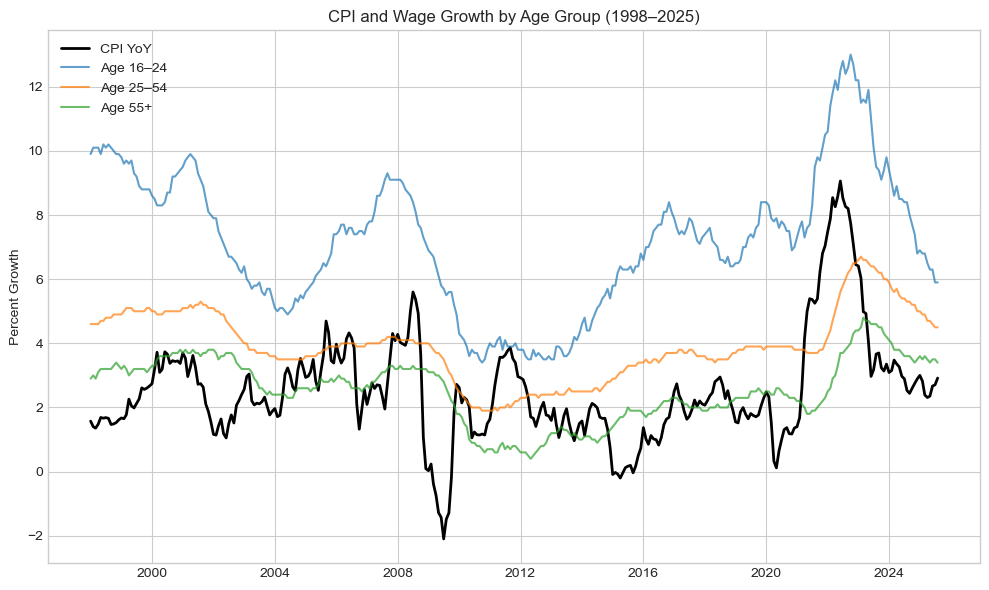

In [ ]:

# 1.Time series trend chart: CPI vs. wage growth rates for three age groups
plt.figure(figsize=(10,6))
plt.plot(data["Date"], data["CPI_YoY"], label="CPI YoY", color="black", linewidth=2)
plt.plot(data["Date"], data["16-24"], label="Age 16–24", alpha=0.7)
plt.plot(data["Date"], data["25-54"], label="Age 25–54", alpha=0.7)
plt.plot(data["Date"], data["55+"], label="Age 55+", alpha=0.7)
plt.title("CPI and Wage Growth by Age Group (1998–2025)")
plt.ylabel("Percent Growth")
plt.legend()
plt.tight_layout()
plt.show()

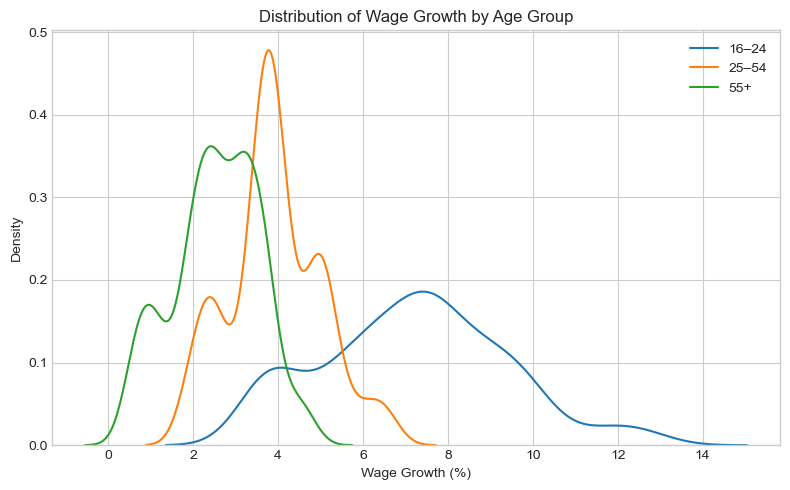

In [ ]:
# 2. Distribution chart: Distribution of wage growth rates across different age groups
plt.figure(figsize=(8,5))
sns.kdeplot(data["16-24"], label="16–24")
sns.kdeplot(data["25-54"], label="25–54")
sns.kdeplot(data["55+"], label="55+")
plt.title("Distribution of Wage Growth by Age Group")
plt.xlabel("Wage Growth (%)")
plt.legend()
plt.tight_layout()
plt.show()

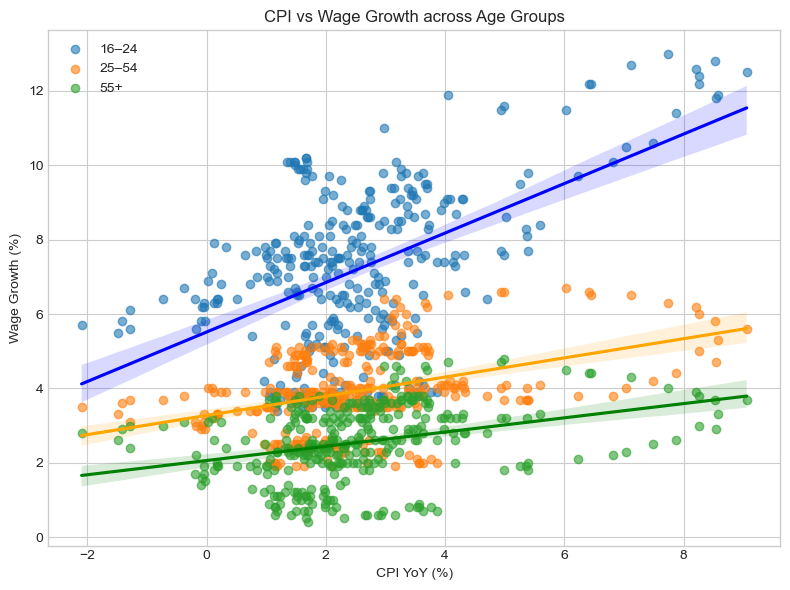

In [ ]:
# 3. Scatter plot and regression line: CPI vs. wage growth for different age groups
plt.figure(figsize=(8,6))

sns.regplot(x="CPI_YoY", y="16-24", data=data, label="16–24", scatter_kws={'alpha':0.6}, line_kws={'color':'blue'})
sns.regplot(x="CPI_YoY", y="25-54", data=data, label="25–54", scatter_kws={'alpha':0.6}, line_kws={'color':'orange'})
sns.regplot(x="CPI_YoY", y="55+", data=data, label="55+", scatter_kws={'alpha':0.6}, line_kws={'color':'green'})

plt.title("CPI vs Wage Growth across Age Groups")
plt.xlabel("CPI YoY (%)")
plt.ylabel("Wage Growth (%)")
plt.legend()
plt.tight_layout()
plt.show()

数据准备完成。最终数据集包含 328 个月的数据。

正在生成最后一幅 3D 图表...


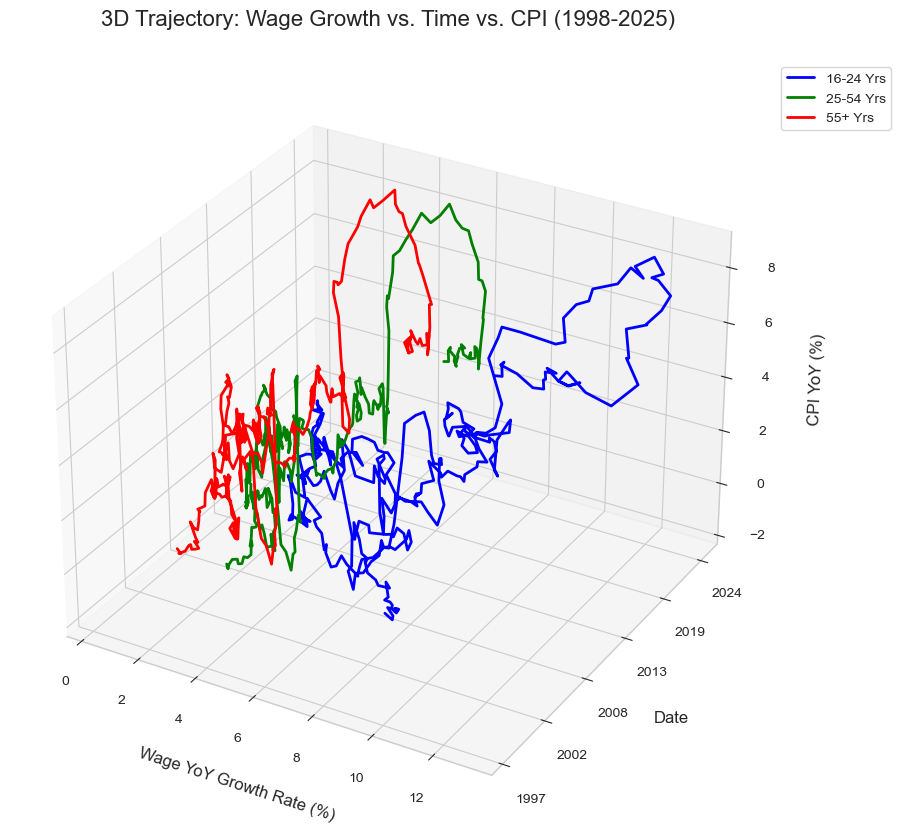


仅最后一幅 3D 图表已生成并显示。


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
from matplotlib import dates as mdates
import warnings
import numpy as np

warnings.simplefilter(action='ignore', category=FutureWarning)

# 1) Data Generation
monthly_file = 'age_with_cpi.xlsx'
quarterly_file = 'GDP.csv'

df_monthly = pd.read_excel(monthly_file, engine='openpyxl')
df_monthly['Date'] = pd.to_datetime(df_monthly['Date'])
df_monthly.set_index('Date', inplace=True)

df_gdp = pd.read_csv(quarterly_file)
df_gdp.columns = ['Date', 'GDP_YoY']
df_gdp['Date'] = pd.to_datetime(df_gdp['Date'])
df_gdp.set_index('Date', inplace=True)
df_gdp['GDP_YoY'] = pd.to_numeric(df_gdp['GDP_YoY'], errors='coerce')

df_gdp_monthly = df_gdp.resample('MS').ffill()
df_merged = df_monthly.merge(df_gdp_monthly, left_index=True, right_index=True, how='inner')
df_merged.dropna(inplace=True)

print(f"数据准备完成。最终数据集包含 {len(df_merged)} 个月的数据。")

data_vars = {
    'CPI': df_merged['CPI_YoY'],
    'Time': mdates.date2num(df_merged.index.to_pydatetime()),
    'Wage_16_24': df_merged['16-24'],
    'Wage_25_54': df_merged['25-54'],
    'Wage_55+': df_merged['55+']
}

label_map = {
    'CPI': 'CPI YoY (%)',
    'Time': 'Date',
    'Wage': 'Wage YoY Growth Rate (%)'
}

wage_groups = ['16-24', 'Wage_25_54', 'Wage_55+']
group_labels = {'16-24': '16-24 Yrs', 'Wage_25_54': '25-54 Yrs', 'Wage_55+': '55+ Yrs'}
colors = ['blue', 'green', 'red']

plot_combinations = [
    {'title': 'CPI vs. Time vs. Wage Growth', 'X': 'CPI', 'Y': 'Time', 'Z': 'Wage'},
    {'title': 'Time vs. CPI vs. Wage Growth', 'X': 'Time', 'Y': 'CPI', 'Z': 'Wage'},
    {'title': 'Wage Growth vs. Time vs. CPI', 'X': 'Wage', 'Y': 'Time', 'Z': 'CPI'},
]

combo = plot_combinations[-1]
fig = plt.figure(figsize=(14, 9))
ax = fig.add_subplot(111, projection='3d')

for group, color in zip(wage_groups, colors):
    X_data = data_vars[group] if combo['X'] == 'Wage' else data_vars[combo['X']]
    Y_data = data_vars[group] if combo['Y'] == 'Wage' else data_vars[combo['Y']]
    Z_data = data_vars[group] if combo['Z'] == 'Wage' else data_vars[combo['Z']]
    ax.plot(X_data, Y_data, Z_data, color=color, linewidth=2, label=group_labels[group])

ax.set_xlabel(label_map[combo['X']], labelpad=20, fontsize=12)
ax.set_ylabel(label_map[combo['Y']], labelpad=20, fontsize=12)
ax.set_zlabel(label_map[combo['Z']], labelpad=20, fontsize=12)
ax.tick_params(pad=10, labelsize=10)

for axis_name in ['X', 'Y', 'Z']:
    if combo[axis_name] == 'Time':
        date_form = mdates.DateFormatter("%Y")
        getattr(ax, f"{axis_name.lower()}axis").set_major_formatter(date_form)

start_year = df_merged.index.min().year
end_year = df_merged.index.max().year
ax.set_title(f'3D Trajectory: {combo["title"]} ({start_year}-{end_year})', fontsize=16, pad=30)


ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1),
          frameon=True, fontsize=10, borderaxespad=0)


plt.subplots_adjust(left=0.1, right=0.85, top=0.92, bottom=0.08)


plt.savefig('chart_3d_final.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nOnly the last 3D chart has been generated and displayed.")

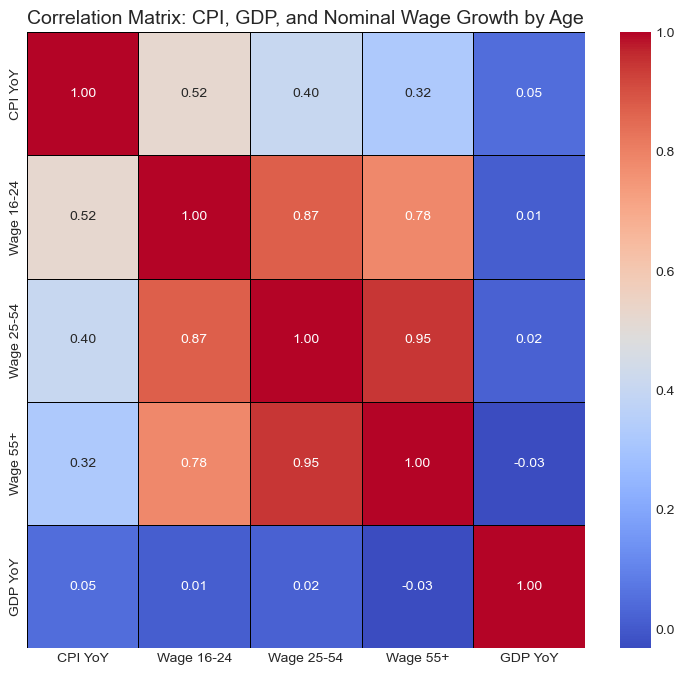

In [ ]:

numeric_cols_gdp = ['CPI_YoY', '16-24', '25-54', '55+', 'GDP_YoY']


corr_matrix_gdp = df_merged[numeric_cols_gdp].corr()


corr_matrix_gdp.columns = ['CPI YoY', 'Wage 16-24', 'Wage 25-54', 'Wage 55+', 'GDP YoY']
corr_matrix_gdp.index = ['CPI YoY', 'Wage 16-24', 'Wage 25-54', 'Wage 55+', 'GDP YoY']

plt.figure(figsize=(9, 8))
sns.heatmap(corr_matrix_gdp, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, linecolor='black')
plt.title('Correlation Matrix: CPI, GDP, and Nominal Wage Growth by Age', fontsize=14)
plt.savefig('chart_correlation_gdp_en.png')
plt.show()

In [ ]:


import statsmodels.formula.api as smf
from tabulate import tabulate


path = "age_with_cpi.xlsx"
df = pd.read_excel(path)


df["Date"] = pd.to_datetime(df["Date"])


cpi_col = "CPI_YoY" if "CPI_YoY" in df.columns else ("CPI" if "CPI" in df.columns else None)
if cpi_col is None:
    raise ValueError("找不到 CPI 列，请确认列名是 'CPI_YoY' 或 'CPI'。")


long = df.melt(
    id_vars=["Date", cpi_col],
    value_vars=["16-24", "25-54", "55+"],
    var_name="AgeGroup",
    value_name="WageGrowth"
).dropna()


long["AgeGroup"] = pd.Categorical(long["AgeGroup"], categories=["25-54", "16-24", "55+"], ordered=True)


formula = f"WageGrowth ~ {cpi_col} * C(AgeGroup, Treatment('25-54'))"
ols = smf.ols(formula, data=long)

n = long.shape[0]
hac_lag = int(np.floor(4 * (n/100)**(2/9)))

res = ols.fit(cov_type="HAC", cov_kwds={"maxlags": hac_lag, "use_correction": True})

print("\n=== 基线回归（HAC 稳健） ===")
print(res.summary())

#Calculate the "slope" (marginal effect) and confidence interval of each age group on the CPI.
# Group slopes:
# 25-54: b_CPI
# 16-24: b_CPI + b_CPI:Age[16-24]
# 55+  : b_CPI + b_CPI:Age[55+]
params = res.params
cov = res.cov_params()

# Parameter name (compatible with different generated column names)
b_cpi = f"{cpi_col}"
b_cpi_y = f"{cpi_col}:C(AgeGroup, Treatment('25-54'))[T.16-24]"
b_cpi_o = f"{cpi_col}:C(AgeGroup, Treatment('25-54'))[T.55+]"

def combo(beta_names):
    """线性组合估计值与标准误（Delta method）"""
    L = np.zeros(len(params))
    name_to_idx = {k: i for i, k in enumerate(params.index)}
    for k in beta_names:
        L[name_to_idx[k]] += 1.0
    est = float(L @ params.values)
    se = float(np.sqrt(L @ cov.values @ L))
    return est, se

out = []
for grp, keys in [
    ("25-54", [b_cpi]),
    ("16-24", [b_cpi, b_cpi_y]),
    ("55+",   [b_cpi, b_cpi_o]),
]:
    est, se = combo(keys)
    ci_l = est - 1.96*se
    ci_u = est + 1.96*se
    out.append([grp, est, se, ci_l, ci_u])

print("\n=== 各年龄组对 CPI 的边际斜率（HAC）===")
print(tabulate(out, headers=["AgeGroup","Slope","SE","CI 2.5%","CI 97.5%"], floatfmt=".4f"))

# Significance test of slope differences (Wald tests)
# H0: The slope for (16-24) is the same as for (25-54) -> b_cpi_y = 0
# H0: The slope for (55+) is the same as for (25-54) -> b_cpi_o = 0
# H0: The slope for (16-24) is the same as for (55+) -> b_cpi_y - b_cpi_o = 0
print("\n=== Wald Test：Slope Differnce ===")
w1 = res.wald_test(f"{b_cpi_y} = 0")
w2 = res.wald_test(f"{b_cpi_o} = 0")
w3 = res.wald_test(f"{b_cpi_y} - {b_cpi_o} = 0")
for name, w in [("16-24 vs 25-54", w1), ("55+ vs 25-54", w2), ("16-24 vs 55+", w3)]:
    stat = float(w.statistic)
    pval = float(w.pvalue)
    df_w = int(w.df_denom) if hasattr(w, "df_denom") else None
    print(f"{name}: chi2 = {stat:.3f}, p = {pval:.4g}")




=== 基线回归（HAC 稳健） ===
                            OLS Regression Results                            
Dep. Variable:             WageGrowth   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     64.56
Date:                Fri, 07 Nov 2025   Prob (F-statistic):           2.18e-58
Time:                        20:17:50   Log-Likelihood:                -1698.4
No. Observations:                 996   AIC:                             3409.
Df Residuals:                     990   BIC:                             3438.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

C:\Users\bruce\AppData\Local\Temp\ipykernel_31620\223990666.py:90: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  stat = float(w.statistic)


In [ ]:

import numpy as np, pandas as pd, matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.stats.api import het_breuschpagan
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf


path = "age_with_cpi.xlsx"
df = pd.read_excel(path)
df["Date"] = pd.to_datetime(df["Date"])
cpi_col = "CPI_YoY" if "CPI_YoY" in df.columns else "CPI"

long = df.melt(id_vars=["Date", cpi_col],
               value_vars=["16-24","25-54","55+"],
               var_name="AgeGroup", value_name="WageGrowth").dropna()
long["AgeGroup"] = pd.Categorical(long["AgeGroup"],
                                  categories=["25-54","16-24","55+"],
                                  ordered=True)

# OLS + HAC
formula = f"WageGrowth ~ {cpi_col} * C(AgeGroup, Treatment('25-54'))"
model = smf.ols(formula, data=long)
n = len(long)
hac_lag = int(np.floor(4*(n/100)**(2/9)))
res = model.fit(cov_type="HAC", cov_kwds={"maxlags": hac_lag, "use_correction": True})
print(res.summary())

# The Marginal Slope for each group
params, cov = res.params, res.cov_params()
b = { "base": cpi_col,
      "y": f"{cpi_col}:C(AgeGroup, Treatment('25-54'))[T.16-24]",
      "o": f"{cpi_col}:C(AgeGroup, Treatment('25-54'))[T.55+]" }

def lin_combo(keys):
    idx = {k:i for i,k in enumerate(params.index)}
    L = np.zeros(len(params))
    for k in keys: L[idx[k]] += 1.0
    est = float(L @ params.values)
    se  = float(np.sqrt(L @ cov.values @ L))
    return est, se, est-1.96*se, est+1.96*se

for name, keys in [("25-54",[b["base"]]), ("16-24",[b["base"],b["y"]]), ("55+",[b["base"],b["o"]])]:
    est, se, lo, hi = lin_combo(keys)
    print(f"{name} slope: {est:.4f}  SE={se:.4f}  95%CI=({lo:.4f},{hi:.4f})")

# Wald Slope Test among groups
print("16-24 vs 25-54:", res.wald_test(f"{b['y']} = 0"))
print("55+   vs 25-54:", res.wald_test(f"{b['o']} = 0"))
print("16-24 vs 55+  :", res.wald_test(f"{b['y']} - {b['o']} = 0"))


                            OLS Regression Results                            
Dep. Variable:             WageGrowth   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     64.56
Date:                Fri, 07 Nov 2025   Prob (F-statistic):           2.18e-58
Time:                        20:29:46   Log-Likelihood:                -1698.4
No. Observations:                 996   AIC:                             3409.
Df Residuals:                     990   BIC:                             3438.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

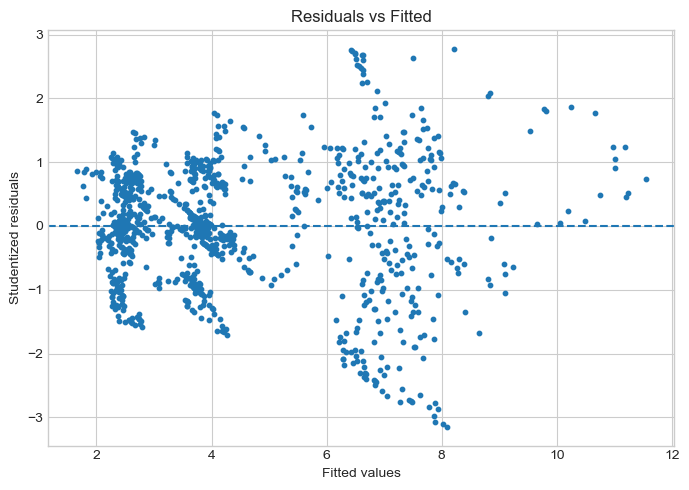

Breusch–Pagan (LM, p, fval, fp): (np.float64(183.66356329297918), np.float64(8.828595668080781e-38), np.float64(44.766409444127284), np.float64(1.0122097547971905e-41))


In [ ]:
# 2) Residuals vs. Fitted Values ​​Plot+ Breusch–Pagan
fitted = res.fittedvalues
stud_resid = res.get_influence().resid_studentized_internal

plt.figure(figsize=(7,5))
plt.scatter(fitted, stud_resid, s=10)
plt.axhline(0, linestyle="--")
plt.xlabel("Fitted values"); plt.ylabel("Studentized residuals")
plt.title("Residuals vs Fitted")
plt.tight_layout()
# plt.savefig("resid_vs_fitted.png", dpi=200)
plt.show()

# Breusch–Pagan
import statsmodels.api as sm
bp_stat = het_breuschpagan(res.resid, res.model.exog)
print("Breusch–Pagan (LM, p, fval, fp):", bp_stat)


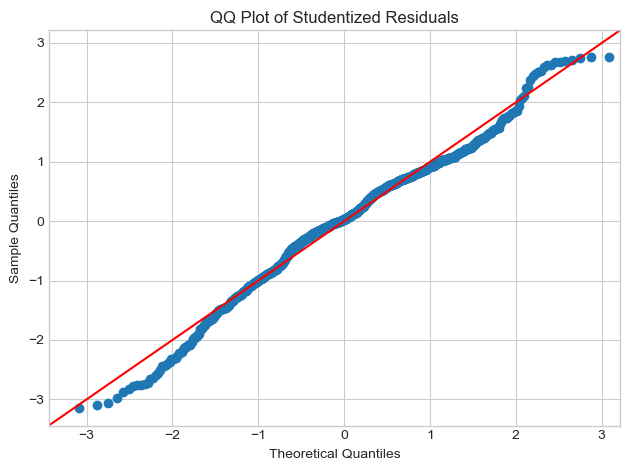

Shapiro–Wilk W=0.985, p=1.661e-08


In [ ]:
# 3) QQ Plot + Shapiro–Wilk
from scipy.stats import shapiro
qqplot(stud_resid, line="45"); plt.title("QQ Plot of Studentized Residuals")
plt.tight_layout()
# plt.savefig("qq_residuals.png", dpi=200)
plt.show()

stat, p = shapiro(res.resid)
print(f"Shapiro–Wilk W={stat:.3f}, p={p:.4g}")


Durbin–Watson = 0.039


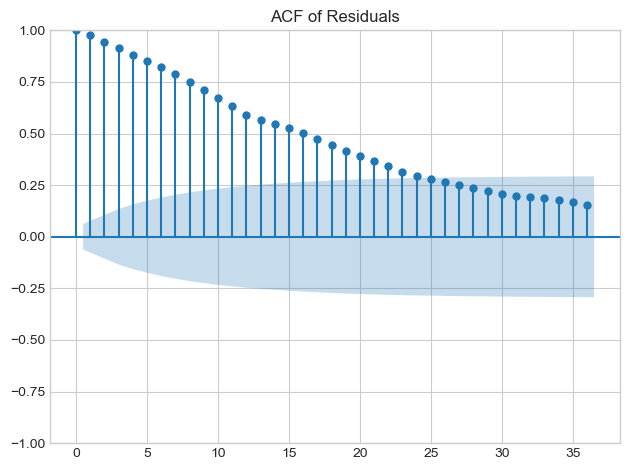

In [ ]:
# 4) Durbin–Watson and Residuals ACF
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(res.resid)
print(f"Durbin–Watson = {dw:.3f}")

plot_acf(res.resid, lags=36)
plt.title("ACF of Residuals")
plt.tight_layout()
# plt.savefig("acf_residuals.png", dpi=200)
plt.show()


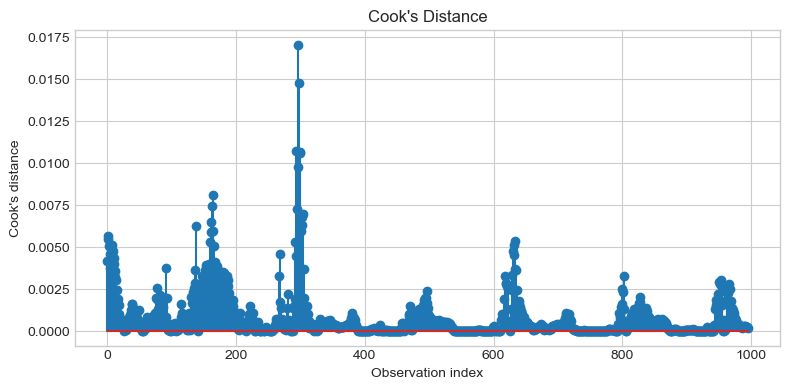

Cook's D > 4/n (0.00402) count = 37; first 10 idx: [ 0  1  2  3  5  6  7  8  9 10]


In [ ]:
# 5) Cook's Distance（
infl = res.get_influence()
c, _ = infl.cooks_distance

plt.figure(figsize=(8,4))
plt.stem(np.arange(len(c)), c)
plt.xlabel("Observation index")
plt.ylabel("Cook's distance")
plt.title("Cook's Distance")
plt.tight_layout()
# plt.savefig("cooks_distance.png", dpi=200)
plt.show()

# Threshold marking
thr = 4 / len(long)
idx = np.where(c > thr)[0]
print(f"Cook's D > 4/n ({thr:.5f}) count = {len(idx)}; first 10 idx:", idx[:10])


In [ ]:
# 6a) Dynamic extension: Adding lagged CPI terms.
long_sorted = long.sort_values("Date").copy()
long_sorted["CPI_L1"] = long_sorted.groupby("AgeGroup")[cpi_col].shift(1)
long_sorted["CPI_L2"] = long_sorted.groupby("AgeGroup")[cpi_col].shift(2)
dyn = smf.ols(f"WageGrowth ~ {cpi_col} + CPI_L1 + CPI_L2 + C(AgeGroup, Treatment('25-54'))"
              f" + {cpi_col}:C(AgeGroup, Treatment('25-54'))", data=long_sorted.dropna())
dyn_res = dyn.fit(cov_type="HAC", cov_kwds={"maxlags": hac_lag, "use_correction": True})
print(dyn_res.summary())

# 6b) WLS（An approximation using the reciprocal of the residual variance as the weight)
resid = res.resid
w = 1/((resid - resid.mean())**2 + 1e-6)
X = res.model.exog; y = res.model.endog
import statsmodels.api as sm
wls_res = sm.WLS(y, X, weights=w).fit(cov_type="HAC", cov_kwds={"maxlags": hac_lag})
print(wls_res.summary())


                            OLS Regression Results                            
Dep. Variable:             WageGrowth   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     306.5
Date:                Fri, 07 Nov 2025   Prob (F-statistic):          6.33e-242
Time:                        20:33:37   Log-Likelihood:                -1662.4
No. Observations:                 990   AIC:                             3341.
Df Residuals:                     982   BIC:                             3380.
Df Model:                           7                                         
Covariance Type:                  HAC                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [ ]:
# 7) Key Significance and Inter-group Wald Table
import pandas as pd
rows = []
for lab, w in [("16-24 vs 25-54", res.wald_test(f"{b['y']} = 0")),
               ("55+ vs 25-54",   res.wald_test(f"{b['o']} = 0")),
               ("16-24 vs 55+",   res.wald_test(f"{b['y']} - {b['o']} = 0"))]:
    rows.append([lab, float(w.statistic), float(w.pvalue)])
wald_df = pd.DataFrame(rows, columns=["Test","chi2","pval"])
print(wald_df)
wald_df.to_csv("wald_tests.csv", index=False)


             Test       chi2      pval
0  16-24 vs 25-54   9.046241  0.002632
1    55+ vs 25-54   0.495779  0.481360
2    16-24 vs 55+  12.501201  0.000407


C:\Users\bruce\AppData\Local\Temp\ipykernel_31620\4207232267.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rows.append([lab, float(w.statistic), float(w.pvalue)])


In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

# 1) Read data (this file is wide: one column per age group)
df_wide = pd.read_excel("age_with_cpi.xlsx")

# 2) Clean + set time
df_wide["Date"] = pd.to_datetime(df_wide["Date"])
df_wide = df_wide.sort_values("Date")

# 3) Wide -> long (required for C(age_group) and interactions)
df = df_wide.melt(
    id_vars=["Date", "CPI_YoY"],
    value_vars=["16-24", "25-54", "55+"],
    var_name="age_group",
    value_name="wage_growth"
).rename(columns={"CPI_YoY": "cpi_yoy", "Date": "time"})

# 4) Set reference group (25–54)
df["age_group"] = pd.Categorical(
    df["age_group"],
    categories=["25-54", "16-24", "55+"],
    ordered=True
)

# 5) Model 0: baseline (CPI only)
m0 = smf.ols("wage_growth ~ cpi_yoy", data=df).fit()

# 6) Model 1: add age dummies (level effects)
m1 = smf.ols("wage_growth ~ cpi_yoy + C(age_group)", data=df).fit()

# 7) Model 2: final (CPI × age interaction)
m2 = smf.ols("wage_growth ~ cpi_yoy * C(age_group)", data=df).fit()

# 8) Alternative A: nonlinear CPI (quadratic)
m_quad = smf.ols("wage_growth ~ cpi_yoy + I(cpi_yoy**2) + C(age_group)", data=df).fit()

# 9) Alternative B: dynamic CPI (one lag)
df["cpi_lag1"] = df.groupby("age_group")["cpi_yoy"].shift(1)
m_lag = smf.ols("wage_growth ~ cpi_yoy + cpi_lag1 + C(age_group)", data=df.dropna()).fit()

# 10) Minimal comparison outputs (enough for Appendix A)
print("Adj R^2:", {"m0": m0.rsquared_adj, "m1": m1.rsquared_adj, "m2": m2.rsquared_adj})
print("AIC:",     {"m0": m0.aic,         "m1": m1.aic,         "m2": m2.aic})

# (Optional) Print summaries you may screenshot for Appendix
# print(m2.summary())
# print(m_quad.summary())
# print(m_lag.summary())


Adj R^2: {'m0': 0.06398753108224386, 'm1': 0.6882258187502074, 'm2': 0.7083458512136384}
AIC: {'m0': 4566.179207556081, 'm1': 3473.2209130105266, 'm2': 3408.7671940000273}


C:\Users\YeDoubleEagles\AppData\Local\Temp\ipykernel_19628\4267578427.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df["cpi_lag1"] = df.groupby("age_group")["cpi_yoy"].shift(1)
